In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
connection = sqlite3.connect("../../data/checking-logs.sqlite")

timestamp = pd.read_sql("SELECT uid, timestamp FROM checker " \
"WHERE uid LIKE 'user_%' ", connection)

timestamp['hours'] = pd.to_datetime(timestamp['timestamp']).dt.hour
timestamp['day_of_week'] = pd.to_datetime(timestamp['timestamp']).dt.day_of_week

timestamp['day_of_week'] = timestamp['day_of_week'].map({0 : 'Mon', 1 : 'Tue', 2: 'Wed', 3 : 'Thu', 4 : 'Fri', 5 : 'Sat', 6 : 'Sun'})
timestamp

,uid,timestamp,hours,day_of_week
0,user_4,2020-04-17 05:19:02.744528,5,Fri
1,user_4,2020-04-17 05:22:35.249331,5,Fri
2,user_4,2020-04-17 05:22:45.549397,5,Fri
3,user_4,2020-04-17 05:34:14.691200,5,Fri
4,user_4,2020-04-17 05:34:24.422370,5,Fri
...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,20,Thu
3203,user_1,2020-05-21 20:22:41.785725,20,Thu
3204,user_1,2020-05-21 20:22:41.877806,20,Thu
3205,user_1,2020-05-21 20:37:00.129678,20,Thu


In [42]:
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_commits = timestamp[['uid', 'day_of_week']].groupby(['uid', 'day_of_week']).size().unstack().reindex(columns=weekday_order).fillna(0)


day_commits['total'] = day_commits.sum(axis=1)
day_commits = day_commits.sort_values(by='total', ascending=False).drop(columns='total')
day_commits



day_of_week,Mon,Tue,Wed,Thu,Fri,Sat,Sun
uid,,,,,,,
user_4,35.0,86.0,33.0,108.0,61.0,0.0,45.0
user_14,50.0,87.0,0.0,17.0,0.0,79.0,26.0
user_2,24.0,131.0,32.0,4.0,0.0,31.0,13.0
user_25,14.0,44.0,15.0,40.0,10.0,66.0,44.0
user_19,7.0,9.0,0.0,78.0,10.0,21.0,51.0
user_26,0.0,1.0,34.0,51.0,2.0,16.0,69.0
user_20,23.0,0.0,8.0,96.0,7.0,3.0,28.0
user_31,5.0,0.0,0.0,7.0,35.0,90.0,7.0
user_10,0.0,16.0,37.0,77.0,1.0,4.0,2.0


In [70]:
hours_commits = timestamp[['uid', 'hours']].groupby(['uid', 'hours']).size().unstack().reindex(columns=range(0, 24)).fillna(0)

hours_commits['total'] = hours_commits.sum(axis=1)
hours_commits = hours_commits.sort_values(by='total', ascending=False).drop(columns='total')

hours_commits

hours,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
uid,,,,,,,,,,,,,,,,,,,,,
user_4,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,...,22.0,12.0,40.0,19.0,11.0,29.0,53.0,86.0,6.0,4.0
user_14,4.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,4.0,...,2.0,25.0,12.0,40.0,28.0,25.0,25.0,33.0,21.0,12.0
user_2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0,13.0,...,18.0,8.0,4.0,8.0,2.0,5.0,16.0,24.0,2.0,15.0
user_25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,10.0,6.0,3.0,29.0,27.0,20.0,43.0,26.0,0.0
user_19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,31.0,18.0,12.0,4.0,11.0,25.0,4.0,2.0,0.0
user_26,4.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,3.0,...,6.0,20.0,14.0,0.0,9.0,0.0,6.0,22.0,4.0,8.0
user_20,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,...,4.0,25.0,43.0,37.0,8.0,7.0,11.0,4.0,16.0,0.0
user_31,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5.0,2.0,2.0,2.0,28.0,8.0,1.0,8.0,0.0,0.0
user_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,9.0,0.0,...,6.0,0.0,16.0,12.0,6.0,29.0,25.0,24.0,2.0,0.0


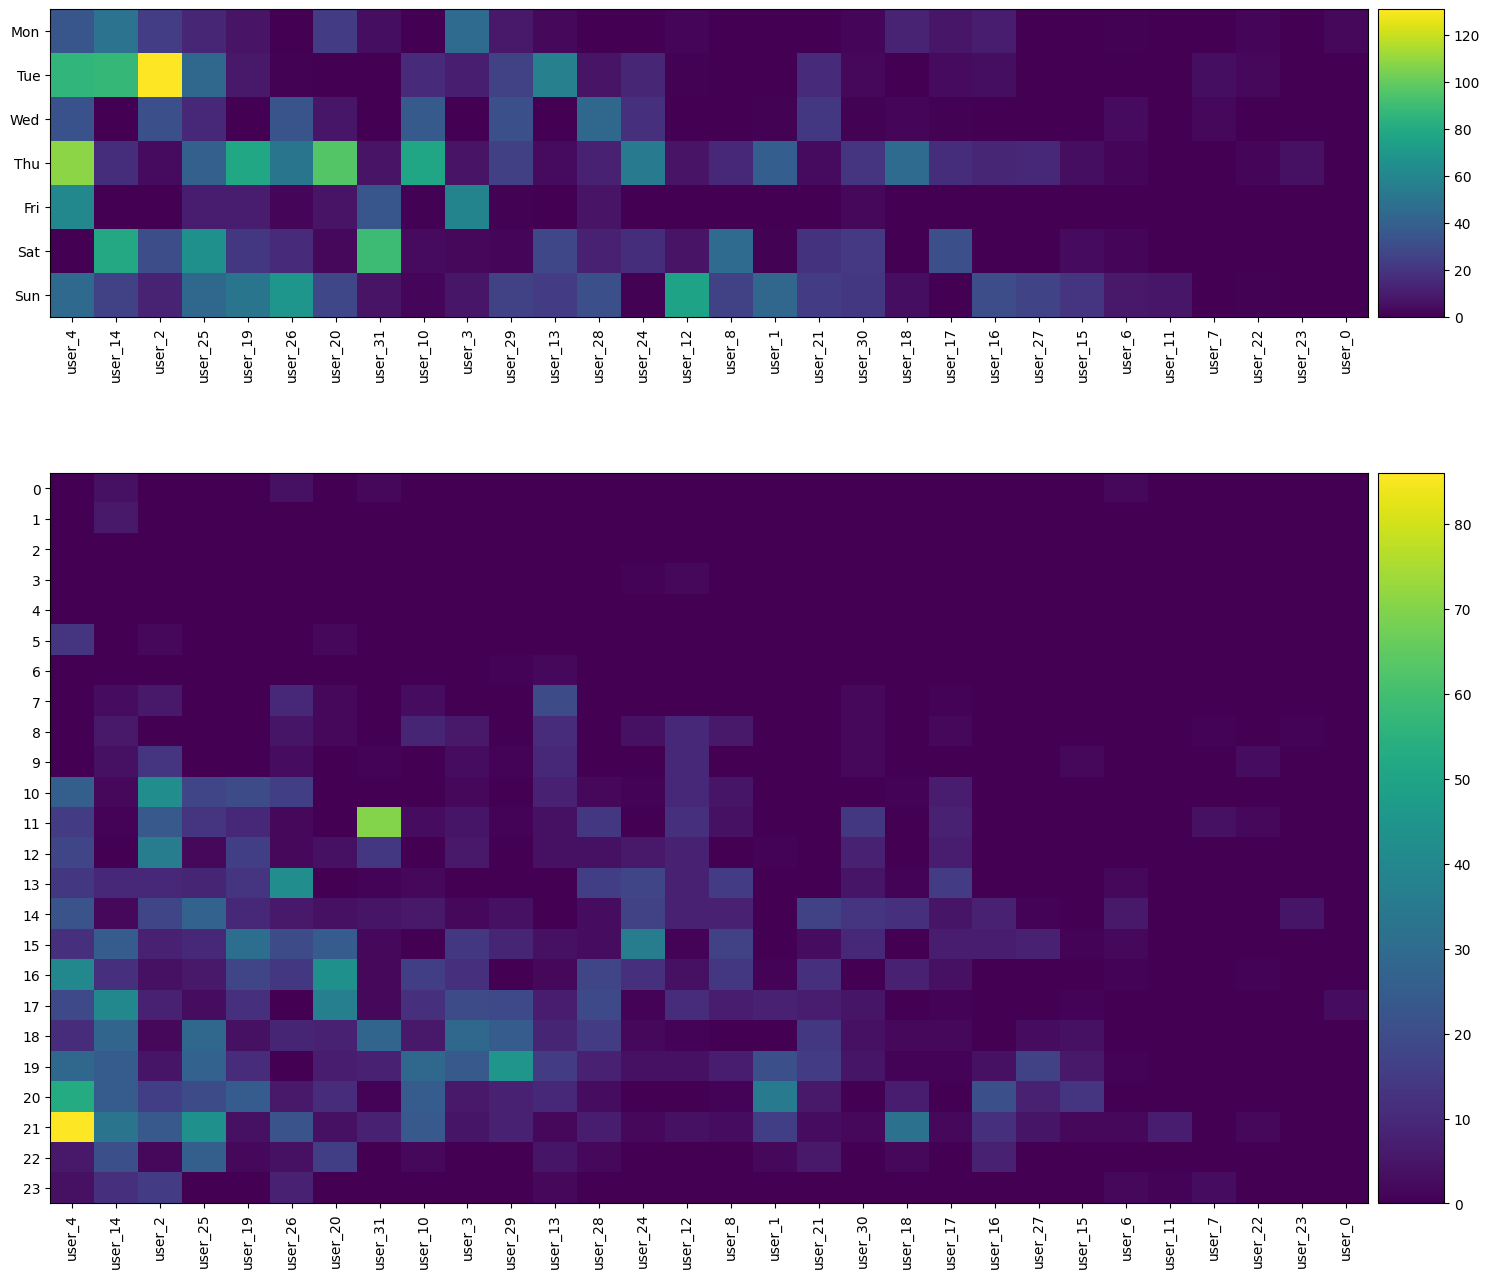

In [80]:
fig, axs = plt.subplots(2, 1, figsize=(15, 15))
heatmap0 = axs[0].imshow(day_commits.T)
axs[0].set_xticks(range(len(day_commits.index)))
axs[0].set_xticklabels(list(day_commits.index), rotation=90)
axs[0].set_yticks(range(0, 7))
axs[0].set_yticklabels(list(day_commits.columns))
divider0 = make_axes_locatable(axs[0])
cax0 = divider0.append_axes("right", size="5%", pad=0.1)
fig.colorbar(heatmap0, cax=cax0)

heatmap1 = axs[1].imshow(hours_commits.T, aspect='auto')
axs[1].set_xticks(range(len(hours_commits.index)))
axs[1].set_xticklabels(list(hours_commits.index), rotation=90)
axs[1].set_yticks(range(0, 24))
axs[1].set_yticklabels(list(hours_commits.columns))
divider1 = make_axes_locatable(axs[1])
cax1 = divider1.append_axes("right", size="5%", pad=0.1)
fig.colorbar(heatmap1, cax=cax1)

plt.tight_layout()
plt.show()

at the end of your Jupyter Notebook create a markdown cell and insert the questions (answer them looking only at the graphs):
* “Which user has the most commits on Tue?” The answer: user_*.
* “Which user has the most commits on Thu?” The answer: user_*.
* “On which weekday do the users not like making a lot of commits?” The answer, for example: Mon.
* “Which user at which hour made the largest number of commits?” The answer, for example: user_1, 15

user_2  
user_4  
Fri  
user_4, 21  

In [81]:
connection.close()